In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [65]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test["Survived"] = ""

In [69]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [70]:
def bar_chart(feature) : 
    survived = train[train['Survived'] == 1][feature].value_counts() 
    dead = train[train['Survived'] == 0][feature].value_counts() 
    df = pd.DataFrame([survived, dead]) 
    df.index = ['Survived', 'Dead']
    df.plot(kind="bar", stacked=True, figsize=(8, 4))

Survived : 
 female    233
male      109
Name: Sex, dtype: int64
Dead : 
 male      468
female     81
Name: Sex, dtype: int64


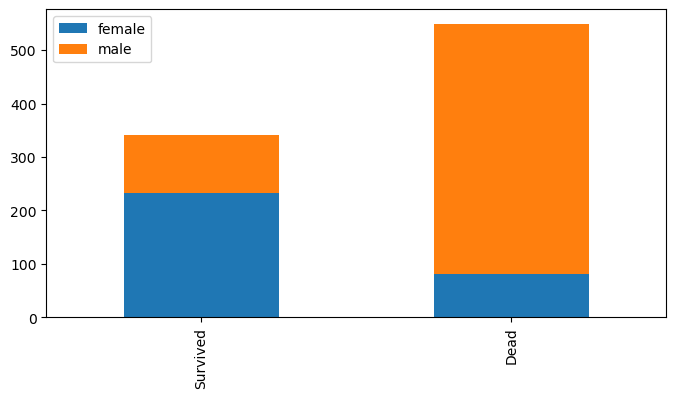

In [71]:
bar_chart('Sex')
print("Survived : \n", train[train.Survived == 1]['Sex'].value_counts())
print("Dead : \n", train[train.Survived == 0]['Sex'].value_counts())

female survived the most and male died the most

Survived : 
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead : 
 3    372
2     97
1     80
Name: Pclass, dtype: int64


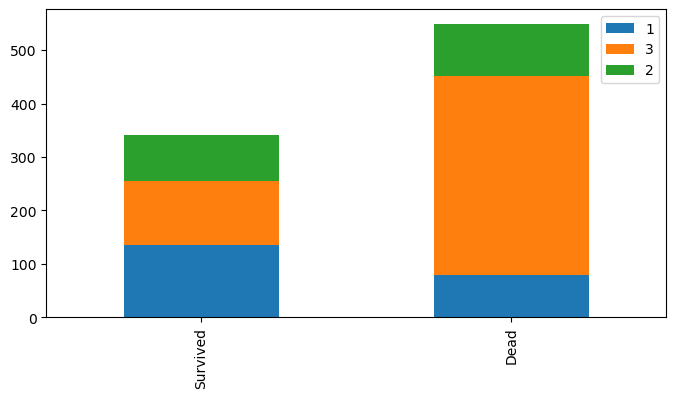

In [72]:
bar_chart("Pclass")
print("Survived : \n", train[train.Survived == 1]['Pclass'].value_counts())
print("Dead : \n", train[train.Survived == 0]['Pclass'].value_counts())

Pclass = 1 people survived the most

Pclass = 2 people died the most 

Survived : 
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead : 
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


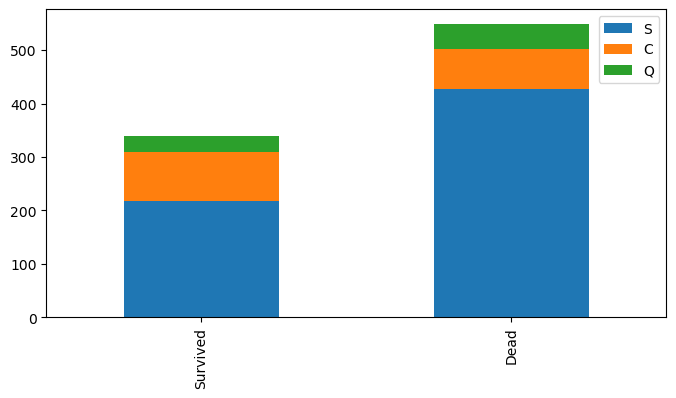

In [73]:
bar_chart("Embarked")
print("Survived : \n", train[train.Survived == 1]['Embarked'].value_counts())
print("Dead : \n", train[train.Survived == 0]['Embarked'].value_counts())

S class People died the most followed by Q class people

Survived : 
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead : 
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


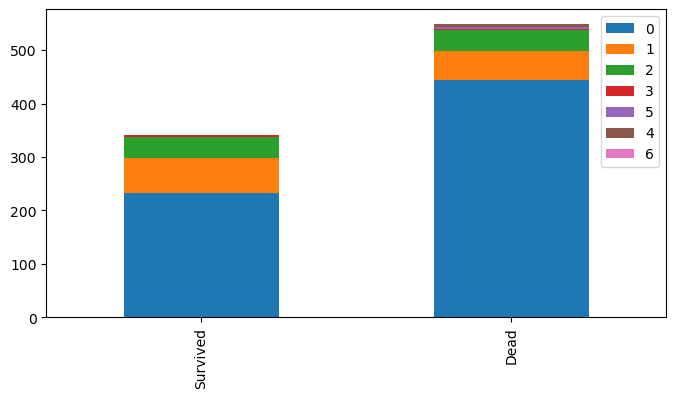

In [74]:
bar_chart("Parch")
print("Survived : \n", train[train.Survived == 1]['Parch'].value_counts())
print("Dead : \n", train[train.Survived == 0]['Parch'].value_counts())

Parch = 0 died the most

Survived : 
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead : 
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


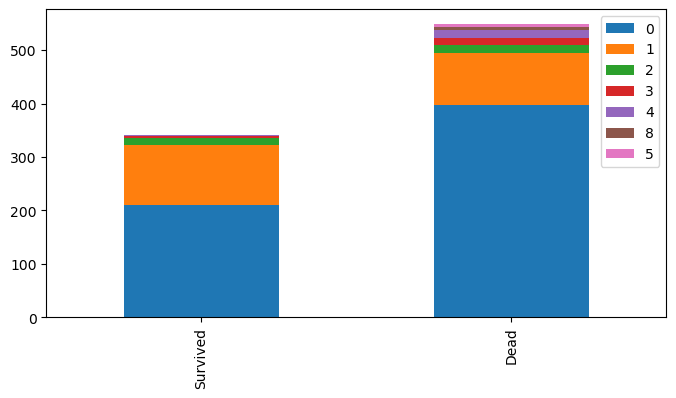

In [75]:
bar_chart("SibSp")
print("Survived : \n", train[train.Survived == 1]['SibSp'].value_counts())
print("Dead : \n", train[train.Survived == 0]['SibSp'].value_counts())

In [76]:
# FEATURE ENGINEERING

In [77]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [79]:
train_test_df = [train, test]


In [80]:
for dataset in train_test_df: 
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [81]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [82]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}
for dataset in train_test_df : 
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [83]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


In [84]:
train['Age'].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)
test['Age'].fillna(test.groupby('Sex')['Age'].transform("median"), inplace=True)

In [85]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [88]:
train['Fare'].isna().sum()

0

In [89]:
train['Fare'].fillna(train.groupby("Pclass")['Fare'].transform("median"), inplace=True)
test['Fare'].fillna(test.groupby("Pclass")['Fare'].transform("median"), inplace=True)

In [90]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in train_test_df : 
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [91]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [92]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [93]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [94]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,1,27.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,1


In [96]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [97]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,0
887,888,1,1,1,19.0,0,0,112053,30.0000,0
888,889,0,3,1,27.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,0,26.0,0,0,111369,30.0000,1


In [98]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [100]:
test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
Survived       False
dtype: bool

In [101]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,330911,7.8292,2,
1,893,3,1,47.0,1,0,363272,7.0000,0,
2,894,2,0,62.0,0,0,240276,9.6875,2,
3,895,3,0,27.0,0,0,315154,8.6625,0,
4,896,3,1,22.0,1,1,3101298,12.2875,0,
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,A.5. 3236,8.0500,0,
414,1306,1,1,39.0,0,0,PC 17758,108.9000,1,
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,
416,1308,3,0,27.0,0,0,359309,8.0500,0,


In [102]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

In [103]:
from sklearn.svm import SVC

model = SVC() 

y_train = train['Survived']
x_train = train[features]

model.fit(x_train, y_train)

SVC()

In [104]:
x_test = test[features]
predict = model.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [115]:
df = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived' : predict}) 

In [117]:
df.to_csv("submission.csv", index=False)

In [119]:
from sklearn.ensemble import RandomForestClassifier
feature = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[feature])
X_test = pd.get_dummies(test[feature])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(X, y_train) 

prediction = model.predict(X_test)


In [120]:
prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
len(prediction)

418

In [126]:
dataframe = pd.DataFrame({"PassengerId" : test.PassengerId, "Survived" : prediction})

In [128]:
dataframe.to_csv("second_submission.csv", index=False)